### Load Test HRRRAK Data

Notebook contents 
* from script `./download_hrrrak_final.sh 2023 02` 
* the goal is to look at all the variables and figure out how to manage them 

created by Cassie Lumbrazo\
last updated: March 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [7]:
filepath = '/home/cassie/python/download_hrrr/'
# file = 'hrrr.20250201/hrrr.t00z.wrfsfcf00.ak.grib2' # why not forcast 0? 
# file01 = 'hrrr.20250201/hrrr.t00z.wrfsfcf01.ak.grib2'
# file02 = 'hrrr.20250201/hrrr.t00z.wrfsfcf02.ak.grib2'
file03 = 'hrrr.20250201/hrrr.t00z.wrfsfcf03.ak.grib2'

# open the file 
# ds = xr.open_dataset(filepath + file03, engine='cfgrib', backend_kwargs={'indexpath': ''})
ds = xr.open_dataset(filepath + file03, engine='cfgrib', filter_by_keys={'stepType':'instant'})
ds

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/

<xarray.Dataset> Size: 20kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    surface            float64 8B ...
    latitude           (y, x) float64 3kB ...
    longitude          (y, x) float64 3kB ...
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    t                  (y, x) float32 2kB ...
    sdwe               (y, x) float32 2kB ...
    snowc              (y, x) float32 2kB ...
    sde                (y, x) float32 2kB ...
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
    prate              (y, x) float32 2kB ...
    sdswrf             (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-03-27T04:23 GRIB to CDM+CF via cfgrib-0.9.1...

#### Plot variables to see what they are...

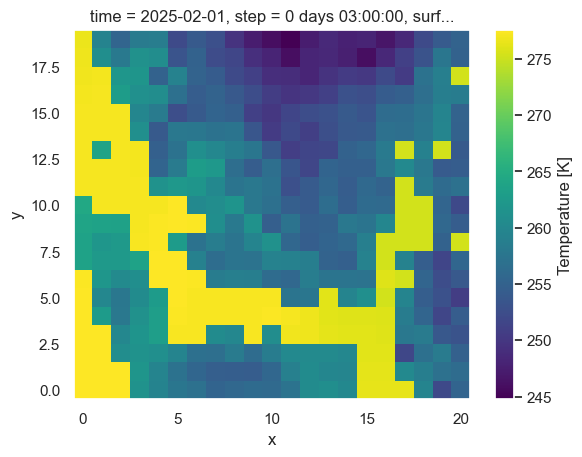

In [11]:
ds.t.plot()

So `t` is surface temperature

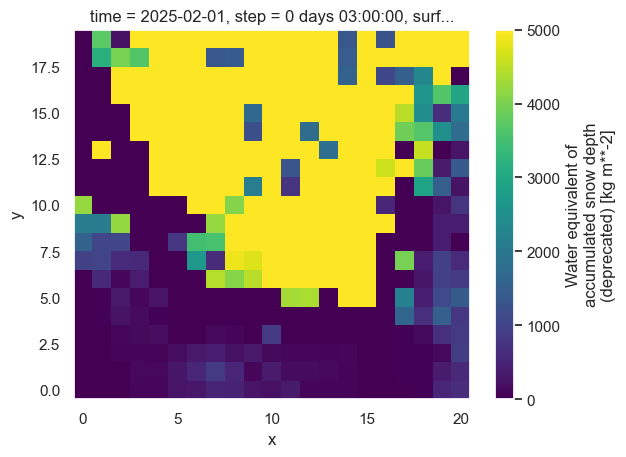

In [12]:
ds.sdwe.plot()

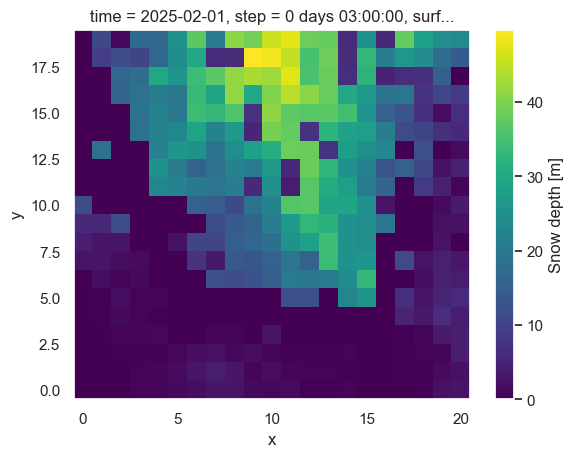

In [13]:
ds.sde.plot()

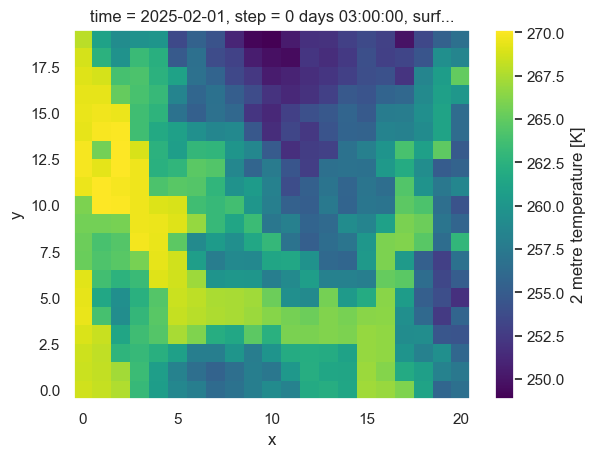

In [14]:
ds.t2m.plot()

Now, `t2m` is the 2m air temperature

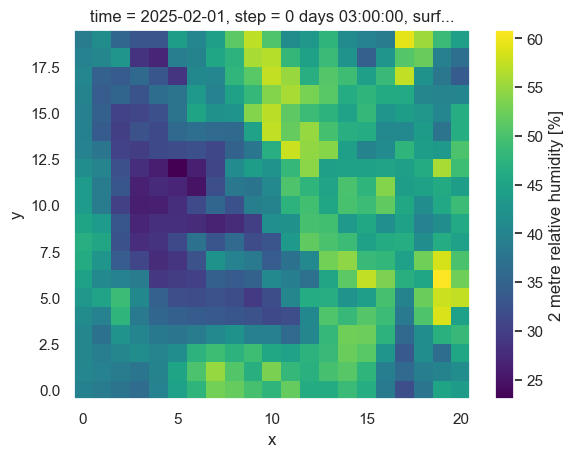

In [15]:
ds.r2.plot()

and 2m relative humidity 

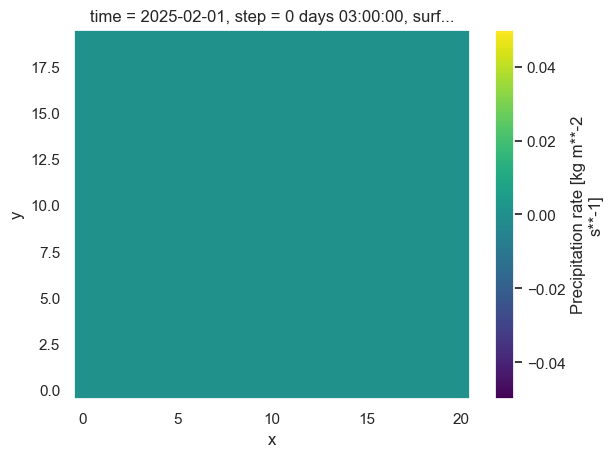

In [16]:
ds.prate.plot()

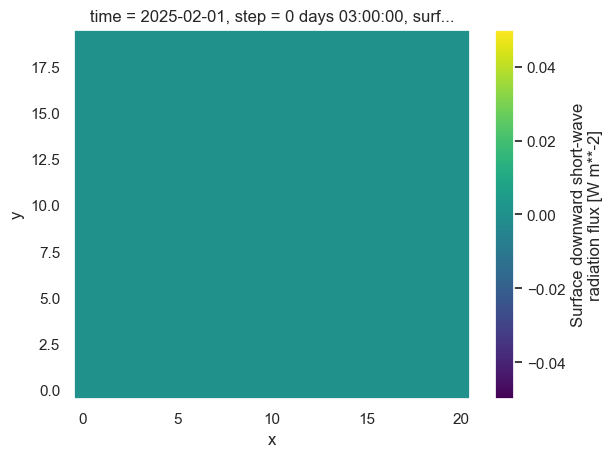

In [17]:
ds.sdswrf.plot()

And of course shortwave is 0 at midnight.. good 

#### Now, when I first tried to download the dataset, it needed `instant` or `accum` variables specified so let's look at `accum` 

In [19]:
filepath = '/home/cassie/python/download_hrrr/'
# file = 'hrrr.20250201/hrrr.t00z.wrfsfcf00.ak.grib2' # why not forcast 0? 
# file01 = 'hrrr.20250201/hrrr.t00z.wrfsfcf01.ak.grib2'
# file02 = 'hrrr.20250201/hrrr.t00z.wrfsfcf02.ak.grib2'
file03 = 'hrrr.20250201/hrrr.t00z.wrfsfcf03.ak.grib2'

# open the file 
# ds = xr.open_dataset(filepath + file03, engine='cfgrib') # getting en error that we need to specify instant or accum keys 
ds = xr.open_dataset(filepath + file03, engine='cfgrib', filter_by_keys={'stepType':'instant'})
# ds = xr.open_dataset(filepath + file03, engine='cfgrib', filter_by_keys={'stepType':'accum'})
ds

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/xarray/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/

<xarray.Dataset> Size: 20kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    surface            float64 8B ...
    latitude           (y, x) float64 3kB ...
    longitude          (y, x) float64 3kB ...
    valid_time         datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    t                  (y, x) float32 2kB ...
    sdwe               (y, x) float32 2kB ...
    snowc              (y, x) float32 2kB ...
    sde                (y, x) float32 2kB ...
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
    prate              (y, x) float32 2kB ...
    sdswrf             (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-03-27T04:31 GRIB to CDM+CF via cfgrib-0.9.1...